# Homeworks for SM-I course

Important: 

1). Please download the latest grcodes, images, and related chapters before working on the homework. 

2). Both pdf files and the source codes must be submitted, or the work will not be marked.  

# Homework 5: Stressed bars by mechanical and thermal loads

**Question 1:**

Consider a uniform bar with cross-section area of $A$, and length $l$ made of linear elastic material. It is subjected to a distributed body-force $b_f$, as shown in Fig.\ref{image:bar1Dbf}. It is fixed at the left-end, meaning that at $x=0, u=0$. At $x=l$, it may also be subjected to a concentrated force $f$. The problem can be treated as one-dimensional (1D), meaning that our concern is mainly the unknown displacement, stress, and strain varying with the coordinate $x$. 

<img src="images/bar1Dbf.png" alt=" " width="450"/><br>


1) Consider only the body force $b_f=q$ (N/m) where $q$ is a constant, derive by hand the formulas for computing the displacement in the $x$-direction, and normal stress $𝜎_{xx}$ in the bar. 

2) Consider both the body force $b_f=q$ (N/m) and the concentrated force $f$ (N), derive by hand the formulas for computing the displacement in the $x$-direction, and normal stress $𝜎_{xx}$. Compare the solutions with the corresponding ones obtained using the code given in the textbook. 

3) Given data, $A = 250 mm^2$, $l=0.5m$, Young's modulus of the material $E=2.1e^{10} Pa$, $b_f = 5000 N/m$, $f=1500 N$, compute and plot the distributions of the displacement and stress along the coordinate $x$.

In [1013]:
# Place curse in this cell, and press Ctrl+Enter to import dependences. 
import sys                         # for accessing the computer system
sys.path.append('../grbin/')  # Change to the directory in your system 

from commonImports import *       # Import dependences from '../grbin/'
import grcodes as gr                 # Import the module of the author
#importlib.reload(gr)            # When grcodes is modified, reload it

from continuum_mechanics import vector 
init_printing(use_unicode=True)      # For latex-like quality printing 
np.set_printoptions(precision=4,suppress=True, 
       formatter={'float': '{:0.4e}'.format})   # Digits in print-outs

1. 

$
u_{xx} (x) = \frac{-b_f}{E A} \\
u(0) = u_L \\
u(l) = f_R \\
u_x (l) = \frac{f_R}{E A} \\
b_f = q \\
f_R = f \\
u_x (x) = \frac{-q x}{E A} +c_0 \\
u(x) = \frac{-q x^2}{2E A} +c_0 x +c_1 \\
u(0) = u_L = \frac{-q 0^2}{2E A} +c_0 0 +c_1 \\
c_1 = u_L \\
u(x) = \frac{-q x^2}{2E A} +c_0 x +u_L \\
u_x (l) = \frac{f_R}{E A} = \frac{-q l}{E A} +c_0 \\
\frac{f_R}{E A} +\frac{q l}{E A} = c_0 \\
c_0 = \frac{f_R + q l}{E A} \\
u(x) = \frac{-q x^2}{2E A} +\frac{f_R + q l}{E A} x +u_L \\
\sigma_{xx} (x) = \frac{\partial u}{\partial x} \\
\sigma_{xx} (x) = \frac{-q x}{E A} +\frac{f_R + q l}{E A}
$

Because there are no point forces, $ f_r = 0 $. Additionally, there is no displacement at $ u_L $. Therefore; \
$ 
u(x) = \frac{q l x}{A E} - \frac{q x^2}{2 A E} \\
\sigma_{xx} (x) = \frac{q l}{A} - \frac{q x}{A} \\
$
Where $ u(x) $ is the displacement of the bar, $ \sigma_{xx} (x) $ is the stress, $ q $ is the body force, $ l $ is the length of the bar, $ A $ is the cross-sectional area, $ E $ is Young's Mudulus, and x is the independent variable representing the location being measured. The maximum displacement of the bar is measured at $ x = l $, and the maximum stress is measured at $ x = 0 $.

2. 

Including a point force $ f $ at the right end of the bar, the formulas derived above can be used, substituting $ f $ for $ f_R $: \
$
u(x) = \frac{f x}{A E} + \frac{q l x}{A E} - \frac{q x^2}{2 A E} \\
\sigma_{xx} (x) = \frac{f}{A} + \frac{q l}{A} - \frac{q x}{A} \\
$

In [1014]:
E, A, l = symbols('E, A, l', nonnegative=True)   #l: length of the bar
x, q, f = symbols('x, q, f') 

u = ((f*x)/(A*E))+((q*l*x)/(A*E))-((q*(x**2))/(2*A*E)), (f/(A))+((q*l)/(A))-((q*x)/(A))

In [1015]:
usubs=[u[i].subs({E:2.1*(10**10),A:250*(10**-6),l:0.5,q:5000,f:1500}) for i in range(len(u))]

3. 

In [1016]:
def plot2curveS(u, xL=0., xR=1., title="f_title"):
    
    '''Print out maximum values and loctions, as well as stationary 
    points, and the values at the stationary points, and boundaries.
    '''
    x = symbols('x')
    dx = 0.01; dxr = dx*10       # x-step
    xi = np.arange(xL, xR+dx, dx)
    uf = sp.lambdify((x), u[0], 'numpy')   #convert Sympy f to numpy f 
    yi = uf(xi)
    if type(yi) != np.ndarray:              #in case, uf is a constant
        #type(yi) == int or type(yi) == float: # or len(yi)==1:  
        xi = np.arange(xL, xR+dxr, dxr)
        yi = float(yi)*np.ones_like(xi)

    fig, ax1 = plt.subplots(figsize=(5.,1.), dpi=300)
    fs = 8     # fontsize
    color = 'black'
    ax1.set_xlabel('location x', fontsize=fs)
    ax1.set_ylabel(title[0], color=color, fontsize=fs)
    ax1.plot(xi, yi, color=color)
    ax1.grid(color='r',ls=':',lw=.3, which='both') # Use both tick 
    ax1.tick_params(axis='x', labelcolor=color, labelsize=fs)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=fs)

    vmax = yi[yi.argmax()]
    max_l = np.argwhere(yi == vmax)
    ax1.plot(xi[max_l],  yi[max_l], 'r*', markersize=4)
    print(f'Maximum {title[0]} value={vmax:.3e}, at x={xi[max_l][0][0]}')
    
    uf = sp.lambdify((x), u[1], 'numpy') #convert Sympy f to numpy f 
    xi = np.arange(xL, xR+dx, dx)
    yi2 = uf(xi)
    if type(yi2) != np.ndarray: # or len(yi2) == 1:
        xi = np.arange(xL, xR+dxr, dxr)
        yi2 = float(yi2)*np.ones_like(xi)

    m1, m2, m3 = np.partition(abs(yi2), 2)[0:3]
    msl=[np.where(abs(yi2)==m1)[0][0],np.where(abs(yi2)==m2)[0][0],
             np.where(abs(yi2)==m3)[0][0]]
    
    vmax = yi2[yi2.argmax()]
    max_l = np.argwhere(yi2 == vmax)
    print(f'Maximum {title[1]} value={vmax:.3e}, at x={xi[max_l][0][0]}')
        
    if abs(xi[msl[2]]-xi[msl[1]])<2*dx:
        if abs(yi2[msl[2]]-0.)<abs(yi2[msl[1]]-0.): msl.pop(1)
        else: msl.pop(2) 
    if len(msl) > 2:
        if abs(xi[msl[2]]-xi[msl[0]])<2*dx:
            if abs(yi2[msl[2]]-0.)<abs(yi2[msl[0]]-0.): msl.pop(0)
            else: msl.pop(2)  
    if len(msl) > 1:
        if abs(xi[msl[1]]-xi[msl[0]])<2*dx:
            if abs(yi2[msl[1]]-0.)<abs(yi2[msl[0]]-0.): msl.pop(0)
            else: msl.pop(1)
         
    ax2 = ax1.twinx()  # instantiate second axes sharing the same x-axis

    color = 'blue'
    ax2.set_ylabel(title[1], color=color, fontsize=fs) 
    ax2.plot(xi, yi2, color=color)
    ax2.plot(xi[max_l], yi2[max_l], 'r*', markersize=4)
    ax2.plot(xi[msl], yi2[msl], 'r*', markersize=4)
    ax1.plot(xi[msl],  yi[msl], 'r*', markersize=4)
    ax2.plot(xi[0], yi2[0], 'ro', markersize=2)
    ax1.plot(xi[0],  yi[0], 'ro', markersize=2)
    ax2.plot(xi[-1], yi2[-1], 'ro', markersize=2)
    ax1.plot(xi[-1],  yi[-1], 'ro', markersize=2)
    ax2.grid(color='r',ls=':',lw=.5, which='both') # Use both tick  
    ax2.tick_params(axis='x', labelcolor=color, labelsize=fs)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=fs)
    np.set_printoptions(formatter={'float': '{: 0.3e}'.format})
    print(f'Extreme {title[0]} values={yi[msl]},\n    at x={xi[msl]}')
    print(f'Critical {title[1]} values={yi2[msl]},\n    at x={xi[msl]}')
    print(f'{title[0]} values at boundary ={yi[0], yi[-1]}')
    print(f'{title[1]} values at boundary ={yi2[0], yi2[-1]}\n')

Maximum 1 value=3.048e-04, at x=0.8
Maximum . value=1.600e+07, at x=0.0
Extreme 1 values=[ 3.048e-04],
    at x=[ 8.000e-01]
Critical . values=[ 0.000e+00],
    at x=[ 8.000e-01]
1 values at boundary =(0.0, 0.00028571428571428606)
. values at boundary =(16000000.0, -4000000.0)



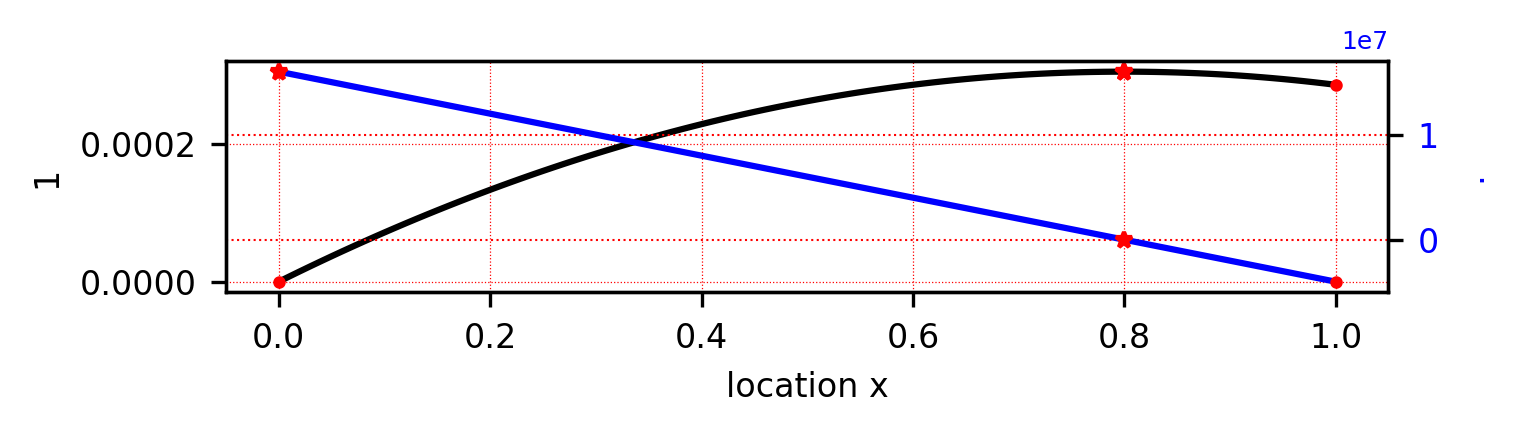

In [1017]:
plot2curveS(usubs, title="1.3")           # ux: solution from method 1
#plt.savefig('images/beam_cq.png', dpi=500)  # save the plot to a file
plt.show()

**Question 2:**

Consider a bar of length $L$ consisting of three thin bars of homogeneous isotropic materials, as shown in Fig.\ref{image:BarWith3bars}. The bars are all fixed on a wall at the left-end, and are rigidly connected at the right-ends. The bars on the top and bottom (bar-1) are identical with Young's modulus $E_1$, thermal expansion coefficient of $𝛼_1$, and each with area $A_1$. The bar in the middle (bar-2) is with Young's modulus $E_2$, area $A_2$, and thermal expansion coefficient of $𝛼_2$. Considering only the displacement in the $x$-direction, and complete the following tasks. 

The data are given as $E_1=200 GPa$, $E_2=70 GPa$, $A_1=5mm^2$, $A_2=8mm^2$ and $L=100mm$, $𝛼_1=11.0E^{-6}/ ^∘C$, $𝛼_2=22.0E^{-6}/ ^∘C$, $Δ𝑇=300^∘C$, and $F=50N$. 

<img src="images/BarWith3bars.png" alt=" " width="400"/><br>

1) Consider only external force $F$ applied at the right-end of the bar, derive the formulas for computing the normal stresses and the internal normal forces in each of the three bars, and the elongation of the bar. 

2) Consider only temperature change $Δ𝑇$ over the entire bars, derive the formulas for computing the normal stresses and the internal normal forces in each of the three bars, and the elongation of the bar. 

3) Using the data given, compute numerical values for normal stresses, internal normal forces in each of the three bars, and the elongation of the bar, when the bar is subjected to both external force and temperature changes. 

4) Compute the principal stresses and the maximum stress and their directions in bar-1. 

1. 

output from solver1D2(): u, 𝜎, u_xx
Is solution correct? True


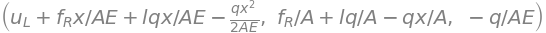

In [1018]:
E, A, l = symbols('E, A, l', nonnegative=True)   #l: length of the bar
x, q, bf, c0, c1 = symbols('x, q, b_f, c0, c1')

fL, fR, uL,uR = symbols('f_L, f_R, u_L, u_R')      
# fL: force at the Left-end; fR: force at the Right-end
# uL: displacement at the Light-end; uR: displacement at the Right-end

bf = sp.Function('b_f')(x)                       # 1D body-force (N/m)
title = ["Displacement", "Stress"]

# Consider the distrubted force is a constant q 
bf = q #0 #(2*sp.sin(x)+8)/E        # one may try other force funtions
u = solver1D2(E, A, bf, l, uL, fR, key='force')

# chech whether the DE is satisfied. 
print(f'Is solution correct? {u[2] == -bf/E/A}') 
u                    # solutions: u; E*u,x; u,xx

In order to use this formula to compute the individual members stresses, first a formula to calculate the total stress is needed: \
$
\sigma_{xx-t} (x) = \frac{f_R}{A} + \frac{l q}{A} - \frac{q x}{A} \\
$
since there isnt an internal body force: \
$
\sigma_{xx-t} (x) = f_R(2\frac{1}{A_1} + \frac{1}{A_2}) \\
$
Using this, the stress in each bar is equal to the total point force over each bars cross sectional area: \
$
\sigma_{xx-1} (x) = \frac{f_R}{A_1} \\
\sigma_{xx-2} (x) = \frac{f_R}{A_2} \\
$
Since the bars are rigidly linked at each end, the deformation of each bar is equal, meaning only one formula is needed: \
$
u(x) = u_L + \frac{f_R x}{A E} \\
$
$ u_L = 0 $, so: \
$
u(x) = (f_R x)(2\frac{1}{A_1 E_1} + \frac{1}{A_2 E_2}) \\
$

2. 

$
\frac{\partial u_T}{\partial x} = \epsilon_{T_{xx}} = \alpha \Delta T \\
u_T = \alpha \Delta T x \\
u_T = (2\alpha_1 \alpha_2 \Delta T) x \\
\sigma_{T_{xx}} = E[\frac{du}{dx} - \alpha \Delta T] \\
\sigma_{T_{xx-1}} = E_1[(2\alpha_1 \alpha_2 \Delta T) - \alpha_1 \Delta T] \\
\sigma_{T_{xx-2}} = E_2[(2\alpha_1 \alpha_2 \Delta T) - \alpha_2 \Delta T] \\
$

3. 

Total displacement is the sum between displacement from the point force and displacement due to thermal forces. Therefore, total displacement: \
$
u(x) =(f_R x)(2\frac{1}{A_1 E_1} + \frac{1}{A_2 E_2}) + (2\alpha_1 \alpha_2 \Delta T)x \\
$
Total thermal stresses of each bar is a function of total displacement, so the thermal stress formulas are updated to the following: \
$
\sigma_{T_{xx}} = E[f_R(2\frac{1}{A_1 E_1} + \frac{1}{A_2 E_2}) + (2\alpha_1 \alpha_2 \Delta T) - \alpha \Delta T] \\
\sigma_{T_{xx-1}} = E_1[f_R(2\frac{1}{A_1 E_1} + \frac{1}{A_2 E_2}) + (2\alpha_1 \alpha_2 \Delta T) - \alpha_1 \Delta T] \\
\sigma_{T_{xx-2}} = E_2[f_R(2\frac{1}{A_1 E_1} + \frac{1}{A_2 E_2}) + (2\alpha_1 \alpha_2 \Delta T) - \alpha_2 \Delta T] \\
$
The total stress of each bar is the sum of the stress due to the point force and due to thermal displacement, resulting in the following stress formulas: \
$
\sigma_{xx-1} = \frac{f_R}{A_1} + E_1[f_R(2\frac{1}{A_1 E_1} + \frac{1}{A_2 E_2}) + (2\alpha_1 \alpha_2 \Delta T) - \alpha_1 \Delta T] \\
\sigma_{xx-2} = \frac{f_R}{A_2} + E_2[f_R(2\frac{1}{A_1 E_1} + \frac{1}{A_2 E_2}) + (2\alpha_1 \alpha_2 \Delta T) - \alpha_2 \Delta T]
$

In [1019]:
E1, E2, A1, A2, a1, a2 = symbols('E1, E2, A1, A2, a1, a2', nonnegative=True) 
DT = symbols('DT')

u = (fR*x)*(2*(1/(A1*E1))+(1/(A2*E2)))+(a1*a2*DT)*x

s1 = (fR/A1)+E1*(diff(u,x)-(a1*DT))
s2 = (fR/A2)+E2*(diff(u,x)-(a2*DT))
s1

In [1020]:
usol=u.subs({E1:200*(10**9),E2:70*(10**9),A1:5*(10**-6),A2:8*(1**-6),l:100*(10**-3),a1:11*(10**-6),a2:22*(10**-6),DT:300,fR:50})
usol

In [1021]:
displacement = usol.subs({x:0.5})
print("Total displacement = "+str(displacement))

Total displacement = 5.00363446428571e-5


In [1022]:
s1sol = s1.subs({E1:200*(10**9),E2:70*(10**9),A1:5*(10**-6),A2:8*(1**-6),l:100*(10**-3),a1:11*(10**-6),a2:22*(10**-6),DT:300,fR:50})
print("Stresses in bar 1 = "+str(s1sol))

Stresses in bar 1 = -629985462.142857


In [1023]:
s2sol = s2.subs({E1:200*(10**9),E2:70*(10**9),A1:5*(10**-6),A2:8*(1**-6),l:100*(10**-3),a1:11*(10**-6),a2:22*(10**-6),DT:300,fR:50})
print("Stresses in each bar 2 = "+str(0.5*s2sol))

Stresses in each bar 2 = -227497452.750000


Maximum 1 value=1.001e-04, at x=1.0
Maximum . value=-6.300e+08, at x=0.0
Extreme 1 values=[ 0.000e+00],
    at x=[ 0.000e+00]
Critical . values=[-6.300e+08],
    at x=[ 0.000e+00]
1 values at boundary =(0.0, 0.000100072689285714)
. values at boundary =(-629985462.142857, -629985462.142857)



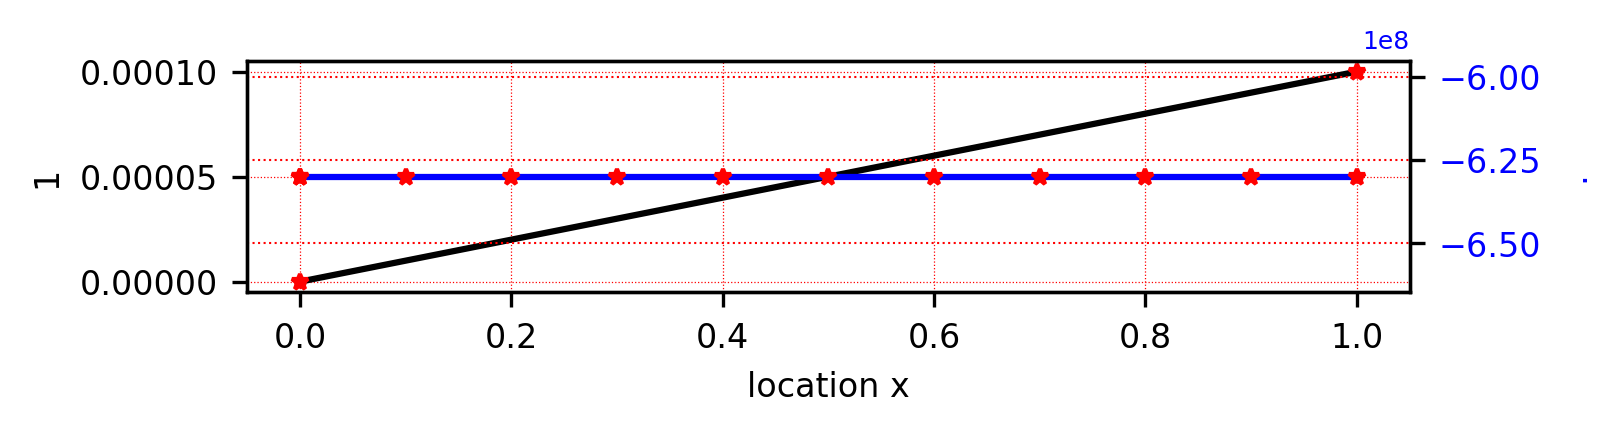

In [1024]:
plot2curveS([usol,s1sol], title="1.3")           # ux: solution from method 1
#plt.savefig('images/beam_cq.png', dpi=500)  # save the plot to a file
plt.show()

Maximum 1 value=1.001e-04, at x=1.0
Maximum . value=-4.550e+08, at x=0.0
Extreme 1 values=[ 0.000e+00],
    at x=[ 0.000e+00]
Critical . values=[-4.550e+08],
    at x=[ 0.000e+00]
1 values at boundary =(0.0, 0.000100072689285714)
. values at boundary =(-454994905.5, -454994905.5)



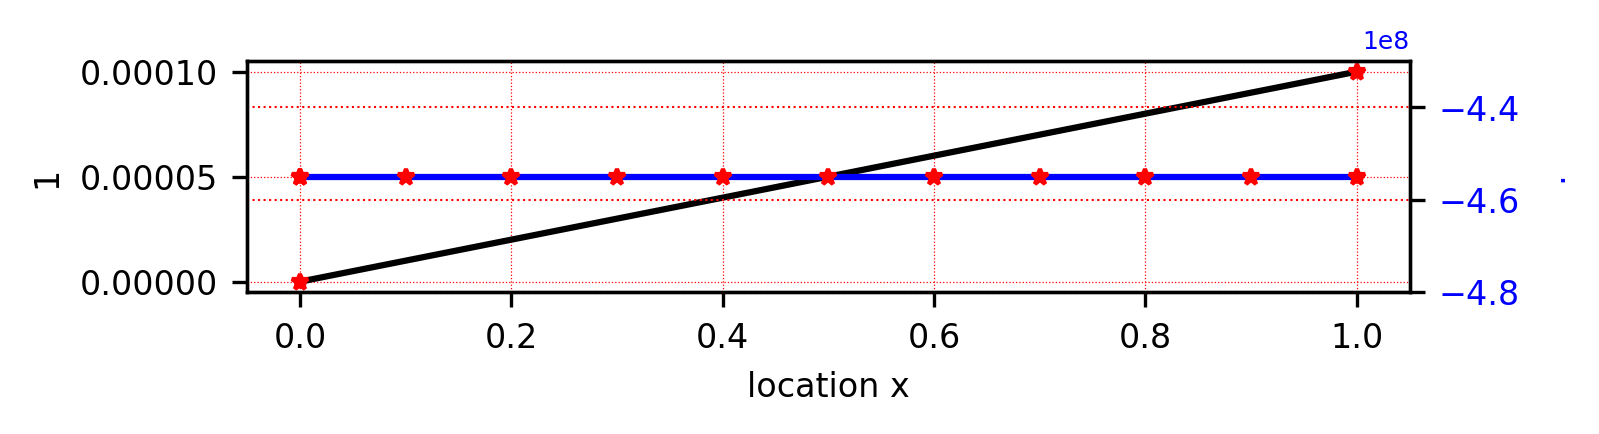

In [1025]:
plot2curveS([usol,s2sol], title="1.3")           # ux: solution from method 1
#plt.savefig('images/beam_cq.png', dpi=500)  # save the plot to a file
plt.show()

4. 

In [1026]:
def principalS(S):
    '''Compute the principal stresses and their direction cosines.
    inputs: 
       S: given stress tensor, numpy array
    return: 
       principal stresses (eigenValues), their direction cosines
       (eigenVectors) ranked by its values. Right-hand-rule is enforced
    '''
    eigenValues, eigenVectors = lg.eig(S)  

    #Sort in order
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    print('Pricipal stress (Eigenvalues):\n',eigenValues,'\n')
    
    # make the first element in the first vector positive (optional):
    #eigenVectors[0,:] = eigenVectors[0,:]/np.sign(eigenVectors[0,0])

    # Determine the sign for given eigenVector-1 and eigenVector-3
    eigenVectors[:,2] = np.cross(eigenVectors[:,0], eigenVectors[:,1])

    angle = np.arccos(eigenVectors[0,0])*180/np.pi       # in degree 
    print(f'Principal stress directions:\n{eigenVectors}\n')
    print(f"Possible angles (n1,x)={angle}∘ or {180-angle}∘")
    
    return eigenValues, eigenVectors

In [1027]:
S1 = np.array([[float(s1sol),0,0],[0,0,0],[0,0,0]])
S2 = np.array([[float(0.5*s2sol),0,0],[0,0,0],[0,0,0]])

eigenValues1, eigenVectors1 = principalS(S1)
eigenValues2, eigenVectors2 = principalS(S2)

Pricipal stress (Eigenvalues):
 [ 0.000e+00  0.000e+00 -6.300e+08] 

Principal stress directions:
[[ 0.000e+00  0.000e+00 -1.000e+00]
 [ 0.000e+00  1.000e+00  0.000e+00]
 [ 1.000e+00  0.000e+00  0.000e+00]]

Possible angles (n1,x)=90.0∘ or 90.0∘
Pricipal stress (Eigenvalues):
 [ 0.000e+00  0.000e+00 -2.275e+08] 

Principal stress directions:
[[ 0.000e+00  0.000e+00 -1.000e+00]
 [ 0.000e+00  1.000e+00  0.000e+00]
 [ 1.000e+00  0.000e+00  0.000e+00]]

Possible angles (n1,x)=90.0∘ or 90.0∘


In [1028]:
σ11, σ12, σ22, 𝜃 = symbols('σ_11, σ_12, σ_22, 𝜃', real = True)
S2D = Matrix([[σ11, σ12], [σ12, σ22]])       # form a 2D stress tensor

T2D = gr.transf_YPRs(𝜃, about = 'z')[0][:2,:2]    # get T for 2D cases
S_𝜃 = sp.simplify(T2D@S2D@T2D.T)       # perform stress transformation

# Find the maximum of the shear stress in S_𝜃:
𝜏_diff_𝜃 = S_𝜃[0,1].diff(𝜃)                    # get the derivative it
𝜃_𝜏max = Matrix(sp.solve(𝜏_diff_𝜃, 𝜃))       # set is to 0, and find 𝜃

anglesmax1 = 𝜃_𝜏max.subs({σ11:s1sol,σ12:0,σ22:0})

print("Angle of maximum shear stress in beam 1 = %3.2f°" % (anglesmax1[0]*57.29578))

anglesmax2 = 𝜃_𝜏max.subs({σ11:0.5*s2sol,σ12:0,σ22:0})

print("Angle of maximum shear stress in one of beam 2 = %3.2f°" % (anglesmax2[0]*57.29578)) 

Angle of maximum shear stress in beam 1 = 45.00°
Angle of maximum shear stress in one of beam 2 = 45.00°


In [1029]:
sr  = symbols("s_r", positive = True) 
sr_ = 𝜃_𝜏max[0].args[0].args[1].args[0].args[1]

𝜏_max = S_𝜃[0,1].subs(𝜃, 𝜃_𝜏max[0]).simplify()
𝜏_max = 𝜏_max.subs(sr**2, sr_**2).simplify().subs(sr_, sr)\
             .subs(sr_**2, sr**2).simplify().subs(sr, sr_)

𝜏_max = 𝜏_max.subs(σ11**2-2*σ11*σ22+σ22**2,  (σ11-σ22)**2).simplify()

maxstress1 = 𝜏_max.subs({σ11:s1sol,σ12:0,σ22:0})

print("Maximum shear stress in beam 1 = %3.2f Pa" % (maxstress1))

maxstress2 = 𝜏_max.subs({σ11:0.5*s2sol,σ12:0,σ22:0})

print("Maximum shear stress in beam 1 = %3.2f Pa" % (maxstress2))

Maximum shear stress in beam 1 = 314992731.07 Pa
Maximum shear stress in beam 1 = 113748726.38 Pa
